In [1]:
%matplotlib inline
import os, sys
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt

import torch
print(torch.__version__)

from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:90% !important; }</style>"))

sys.path.append('..')
import pytorchnet

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

0.4.1


Load the Boston House Price data set, randomly shuffle the rows, and choose the first 50 as the test set with the rest as train set:

In [2]:
boston=np.load('boston.npz')
data=boston['data']

np.random.shuffle(data)

test=data[:50]
train=data[50:]

inds=sorted(range(test.shape[0]),key=lambda i:test[i,-1])
test=test[inds] # sort the test in ascending price order, looks better for graphing

print(train.shape,test.shape)

(456, 14) (50, 14)


10000 10.211748123168945
20000 7.400780200958252
30000 5.429685115814209
40000 5.064690113067627
50000 4.103824615478516
60000 3.5002686977386475
70000 4.518130302429199
80000 3.7733490467071533
90000 3.1700096130371094
100000 4.066324234008789


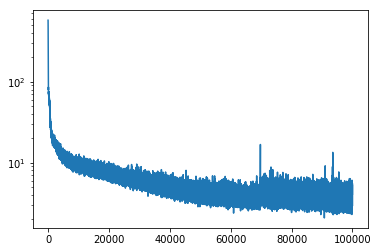

In [3]:
net=pytorchnet.LinearNet(train.shape[1]-1,1,[30,20,10],0.05)
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(train[:,:-1]).float()
yt=torch.from_numpy(train[:,-1:]).float()

loss=torch.nn.MSELoss()
opt=torch.optim.Adam(net.parameters())

iters=100000
losses=[]

for i in range(1,iters+1):
    opt.zero_grad()
    prices=net(xt)
    lossval=loss(prices,yt)
    
    lossval.backward()
    opt.step()
    
    losses.append(lossval.item())
    
    if i%(iters//10)==0:
        print(i,losses[-1])
        
plt.semilogy(losses)

2.9818563117980954


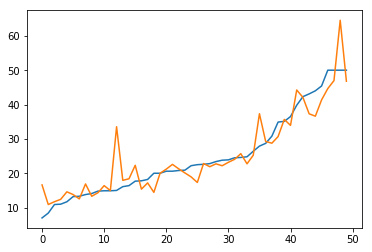

In [4]:
with torch.no_grad():
    net.eval()
    testxt=torch.from_numpy(test[:,:-1]).float()
    testprices=net(testxt).data.numpy()

print(np.average(np.absolute(test[:,-1]-testprices[:,0])))
plt.plot(test[:,-1])
plt.plot(testprices[:,0])

4.4503545598616645


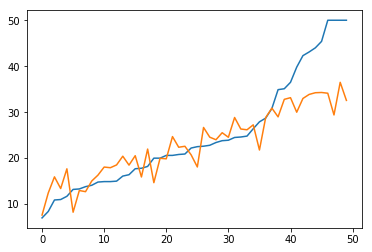

In [5]:
from sklearn.linear_model import Lasso

reg=Lasso()

reg.fit(train[:,:-1],train[:,-1:])

testprices=reg.predict(test[:,:-1])

print(np.average(np.absolute(test[:,-1]-testprices)))
plt.plot(test[:,-1])
plt.plot(testprices)

3.804


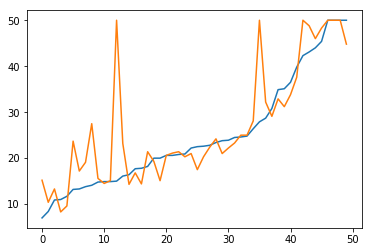

In [6]:
from sklearn import tree

reg=tree.DecisionTreeRegressor()

reg.fit(train[:,:-1],train[:,-1:])

testprices=reg.predict(test[:,:-1])

print(np.average(np.absolute(test[:,-1]-testprices)))
plt.plot(test[:,-1])
plt.plot(testprices)

3.865375067191869


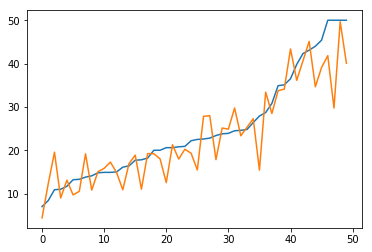

In [8]:
from sklearn import svm

reg=svm.SVR(kernel='linear', C=100, gamma='auto')

reg.fit(train[:,:-1],train[:,-1])

testprices=reg.predict(test[:,:-1])

print(np.average(np.absolute(test[:,-1]-testprices)))
plt.plot(test[:,-1])
plt.plot(testprices)